<a href="https://colab.research.google.com/github/aimalz/TheLastMetric/blob/master/pz_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial downloads and installs

In [1]:
!pip install --quiet pzflow corner
!git clone https://github.com/aimalz/TheLastMetric.git
%cd TheLastMetric

     |████████████████████████████████| 7.8MB 5.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
Cloning into 'TheLastMetric'...
remote: Enumerating objects: 417, done.
remote: Counting objects: 100% (417/417), done.
remote: Compressing objects: 100% (355/355), done.
remote: Total 417 (delta 117), reused 325 (delta 60), pack-reused 0
Receiving objects: 100% (417/417), 24.74 MiB | 35.28 MiB/s, done.
Resolving deltas: 100% (117/117), done.
/content/TheLastMetric


## Imports and downloading data

In [2]:
%pylab inline
from utils import load_data, compute_last_metric
import corner
from pzflow import Flow

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Loading data
z_cats, phot_cats, available_os, os_names, os_colors = load_data()

In [4]:
# Loading pre-trained flows
flows = {}
for os in available_os:
  flows[os] = [Flow(file=f"trained_flows/flow_for_run_{os}_%d.pkl"%(i+1) ) for i in range(10)]

## Testing posterior estimation of individual p(z | x)

In [8]:
tx = np.linspace(0.01,3.5,256)
all_logp = {}
for which_os in available_os:
  flow = flows[which_os]
  cat = phot_cats[which_os][-100:].to_pandas()
  logp = np.stack([f.posterior(f.info["condition_scaler"](cat), column="z_true", grid=tx) for f in flow],axis=0)
  all_logp[which_os] = logp

Text(0.5, 1.0, 'Posterior prediction uncertainty under deep ensemble (for baseline_v1_5_10yrs)')

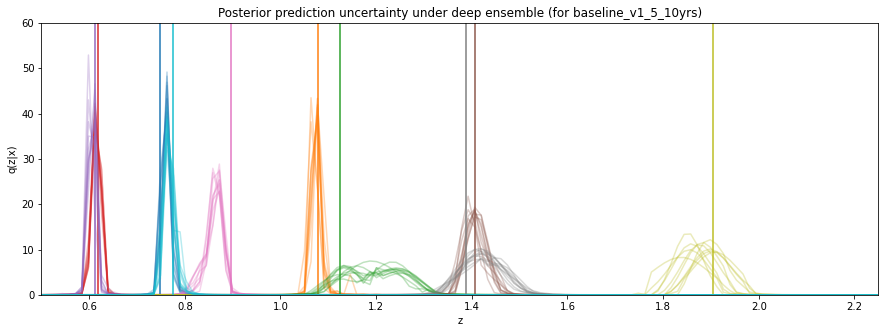

In [56]:
# Let's look at the baseline as a representative example
which_os = '1_4_y10'
figure(figsize=(15,5))
for ind in range(10):
  for i in range(10):
    plot(tx, all_logp[which_os][i][ind], color='C%d'%ind,alpha=0.3)
  cat = phot_cats[which_os][-100:]
  axvline(cat['z_true'][ind], color='C%d'%ind, label=os_names[which_os])
xlim(0.5,2.25)
ylim(0,60)
xlabel('z')
ylabel('q(z|x)')
title('Posterior prediction uncertainty under deep ensemble (for %s)'%os_names[which_os])

Text(0.5, 1.0, 'Posterior prediction uncertainty under deep ensemble')

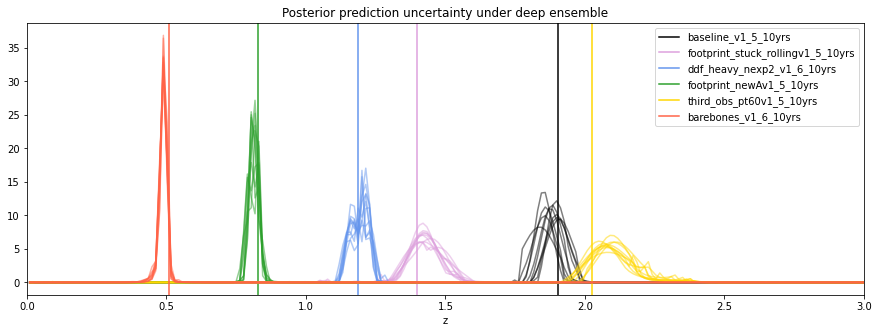

In [32]:
figure(figsize=(15,5))
ind = 8
for which_os in available_os:
  for i in range(10):
    plot(tx, all_logp[which_os][i][ind], color=os_colors[which_os],alpha=0.5)
  cat = phot_cats[which_os][-100:]
  axvline(cat['z_true'][ind],color=os_colors[which_os], label=os_names[which_os])
xlim(0.,3.)
xlabel('z')
legend()
title('Posterior prediction uncertainty under deep ensemble')


Text(0.5, 1.0, 'Posterior prediction uncertainty under deep ensemble')

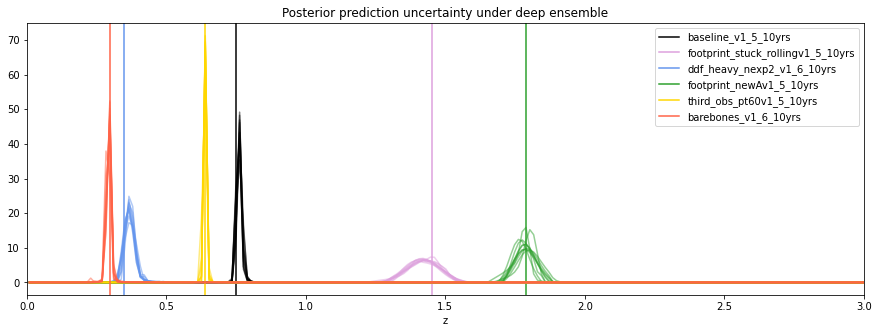

In [33]:
figure(figsize=(15,5))
ind = 0
for which_os in available_os:
  for i in range(10):
    plot(tx, all_logp[which_os][i][ind], color=os_colors[which_os],alpha=0.5)
  cat = phot_cats[which_os][-100:]
  axvline(cat['z_true'][ind],color=os_colors[which_os], label=os_names[which_os])
xlim(0.,3.)
xlabel('z')
legend()
title('Posterior prediction uncertainty under deep ensemble')
